In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 1 Data Wrangling </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.1 Inquire structural integrity </span>

In [188]:
path = 'data/raw/netflix_userbase.csv'
df_netflix = pd.read_csv(path, index_col=False)


In [189]:
df_netflix.reset_index(drop=True, inplace=True)
df_netflix.head(25)


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,2022-03-18,2023-06-27,France,29,Female,Smart TV,1 Month
6,7,Standard,12,2021-12-09,2023-06-25,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,2023-04-02,2023-06-24,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,2022-10-20,2023-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,2023-01-07,2023-06-22,Italy,44,Female,Smart TV,1 Month


In [190]:
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            70 non-null     int64 
 1   Subscription Type  70 non-null     object
 2   Monthly Revenue    70 non-null     int64 
 3   Join Date          70 non-null     object
 4   Last Payment Date  70 non-null     object
 5   Country            70 non-null     object
 6   Age                70 non-null     int64 
 7   Gender             70 non-null     object
 8   Device             70 non-null     object
 9   Plan Duration      70 non-null     object
dtypes: int64(3), object(7)
memory usage: 5.6+ KB


In [191]:
df_netflix.describe()


,User ID,Monthly Revenue,Age
count,70.000000,70.000000,70.000000
mean,35.500000,12.128571,36.600000
std,20.351085,2.070647,6.601273
min,1.000000,10.000000,26.000000
25%,18.250000,10.000000,31.000000
50%,35.500000,12.000000,36.000000
75%,52.750000,15.000000,41.000000
max,70.000000,15.000000,51.000000


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.2 Enhance data accessibility </span>

In [192]:
print("Pre-processing Columns:")
df_netflix.columns


Pre-processing Columns:


Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [193]:
df_netflix.rename(columns={'User ID': 'user_id', 'Subscription Type': 'subscription_type', 'Monthly Revenue': 
                           'monthly_revenue', 'Join Date': 'join_date', 'Last Payment Date': 'last_payment_date',
                           'Country': 'country', 'Age': 'age', 'Gender': 'gender', 'Device': 'device', 
                           'Plan Duration': 'plan_duration'}, inplace=True)


In [194]:
print("Post-processing Columns:")
df_netflix.columns


Post-processing Columns:


Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.3 Analyze any Missing values  </span>

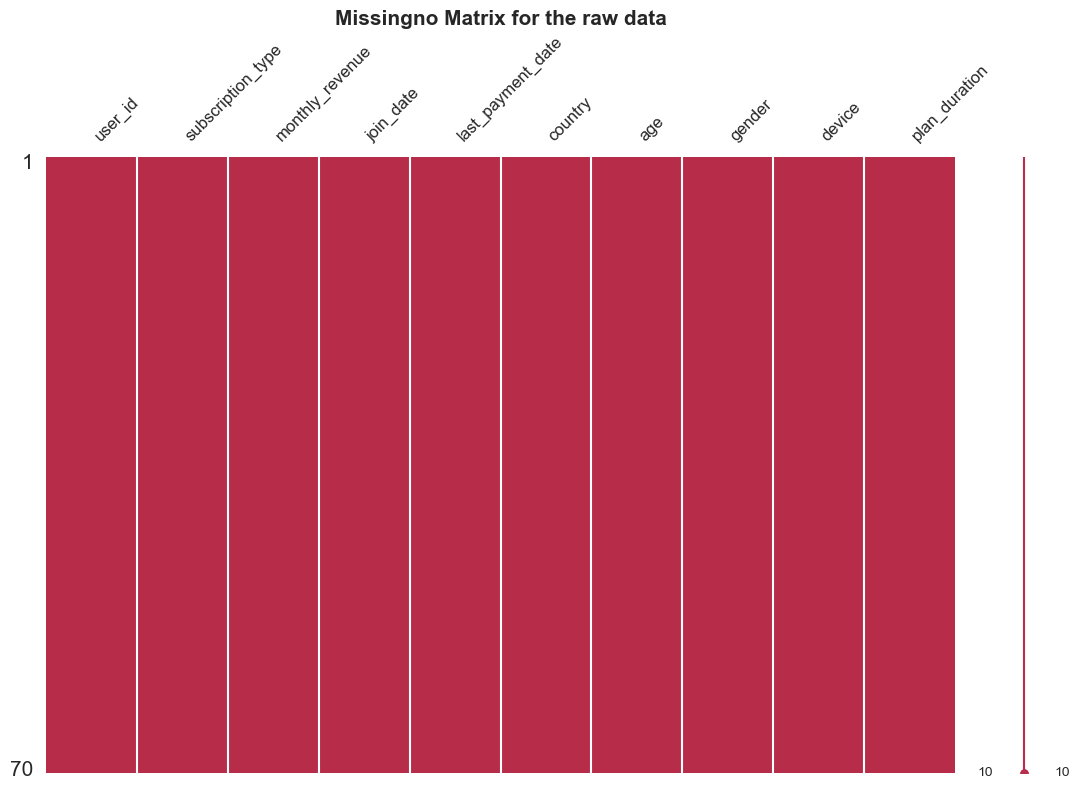

In [195]:
msn.matrix(df_netflix, color=(0.72, 0.18, 0.29), figsize=[13, 8], fontsize=12)
plt.title("Missingno Matrix for the raw data", fontsize=15, fontweight='bold')
plt.show()


In [196]:
df_netflix.isnull().sum()


user_id              0
subscription_type    0
monthly_revenue      0
join_date            0
last_payment_date    0
country              0
age                  0
gender               0
device               0
plan_duration        0
dtype: int64

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.4 Data cleaning </span>

In [197]:
df_netflix.shape


(70, 10)

In [198]:
df_netflix.dropna(axis='columns')


,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
65,66,Premium,15,2022-01-30,2023-06-27,France,29,Male,Smartphone,1 Month
66,67,Basic,10,2022-09-18,2023-06-25,Brazil,47,Female,Smart TV,1 Month
67,68,Standard,12,2021-11-09,2023-06-24,Mexico,33,Male,Tablet,1 Month
68,69,Premium,15,2022-12-23,2023-06-23,Spain,36,Female,Laptop,1 Month


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.5 Find duplicate Cell </span>

In [199]:
duplicated_cells = 0
check_duplicate = df_netflix.duplicated()


In [200]:
for row in check_duplicate:
    if row:
        duplicated_cells += 1

duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)

• Total Cells: 70 
• Duplicated Cells: 0 
• Duplicate %: 0.0


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.6 Check for Outliers </span>

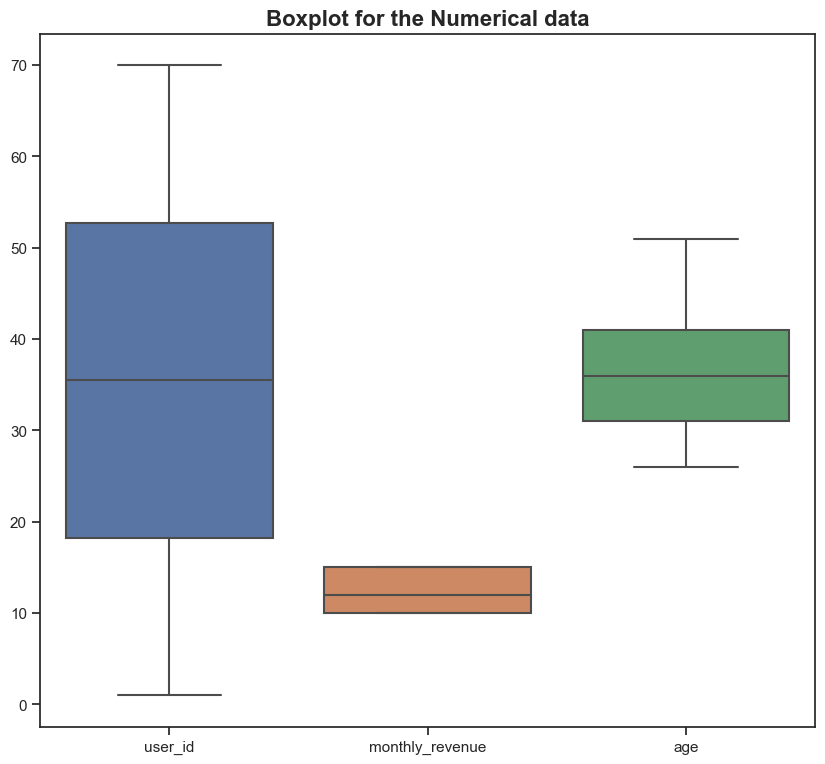

In [201]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_netflix)
plt.title("Boxplot for the Numerical data", fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.7 Ensure data consistency</span>

In [202]:
df_netflix['join_date'] = pd.to_datetime(df_netflix['join_date'])
df_netflix['last_payment_date'] = pd.to_datetime(df_netflix['last_payment_date'])
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            70 non-null     int64         
 1   subscription_type  70 non-null     object        
 2   monthly_revenue    70 non-null     int64         
 3   join_date          70 non-null     datetime64[ns]
 4   last_payment_date  70 non-null     datetime64[ns]
 5   country            70 non-null     object        
 6   age                70 non-null     int64         
 7   gender             70 non-null     object        
 8   device             70 non-null     object        
 9   plan_duration      70 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 5.6+ KB


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.8 Combine Features</span>

In [203]:
df_netflix['subscribed_duration'] = df_netflix['last_payment_date'] - df_netflix['join_date']
df_netflix['subscribed_duration'] = df_netflix['subscribed_duration'].dt.days
df_netflix['subscribed_duration'].head(25)


0     511
1     655
2     119
3     351
4      58
5     466
6     563
7      83
8     246
9     166
10    402
11     97
12    574
13    329
14     50
15    446
16    517
17    614
18    128
19     26
20     12
21    341
22    569
23    449
24    106
Name: subscribed_duration, dtype: int64

In [204]:
df_netflix['start_month'] = df_netflix['join_date'].dt.month
df_netflix['start_month'].head(25)


0      1
1      9
2      2
3      7
4      5
5      3
6     12
7      4
8     10
9      1
10     5
11     3
12    11
13     8
14     5
15     4
16     1
17    10
18     2
19     5
20     6
21     7
22    12
23     4
24     3
Name: start_month, dtype: int64

In [205]:
# Customer Lifetime Value (clv)
df_netflix['clv'] = df_netflix['subscribed_duration'] * df_netflix['monthly_revenue']
df_netflix['clv'].head(25)                            


0     5110
1     9825
2     1428
3     4212
4      580
5     6990
6     6756
7      830
8     2952
9     2490
10    4020
11    1455
12    6888
13    3290
14     600
15    6690
16    5170
17    7368
18    1920
19     260
20     180
21    3410
22    6828
23    5388
24    1060
Name: clv, dtype: int64

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.9 Truncate redundant features </span>

In [206]:
df_netflix = df_netflix.drop(['last_payment_date', 'join_date'], axis=1)
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              70 non-null     int64 
 1   subscription_type    70 non-null     object
 2   monthly_revenue      70 non-null     int64 
 3   country              70 non-null     object
 4   age                  70 non-null     int64 
 5   gender               70 non-null     object
 6   device               70 non-null     object
 7   plan_duration        70 non-null     object
 8   subscribed_duration  70 non-null     int64 
 9   start_month          70 non-null     int64 
 10  clv                  70 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 6.1+ KB


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.10 Save processed data  for future Model Integration</span>

In [207]:
try:
    df_netflix.to_csv('data/processed/netflix_processed.csv', sep=',', index=False)
    df_netflix.to_json('data/processed/netflix_processed.json')

except Exception as exc:
    print("! Exception encountered", exc)

else:
    print("Dataframe successfully saved")    
    

Dataframe successfully saved


<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 2 Feature Analysis  </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.1 Univariate Inspection </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenues </span>

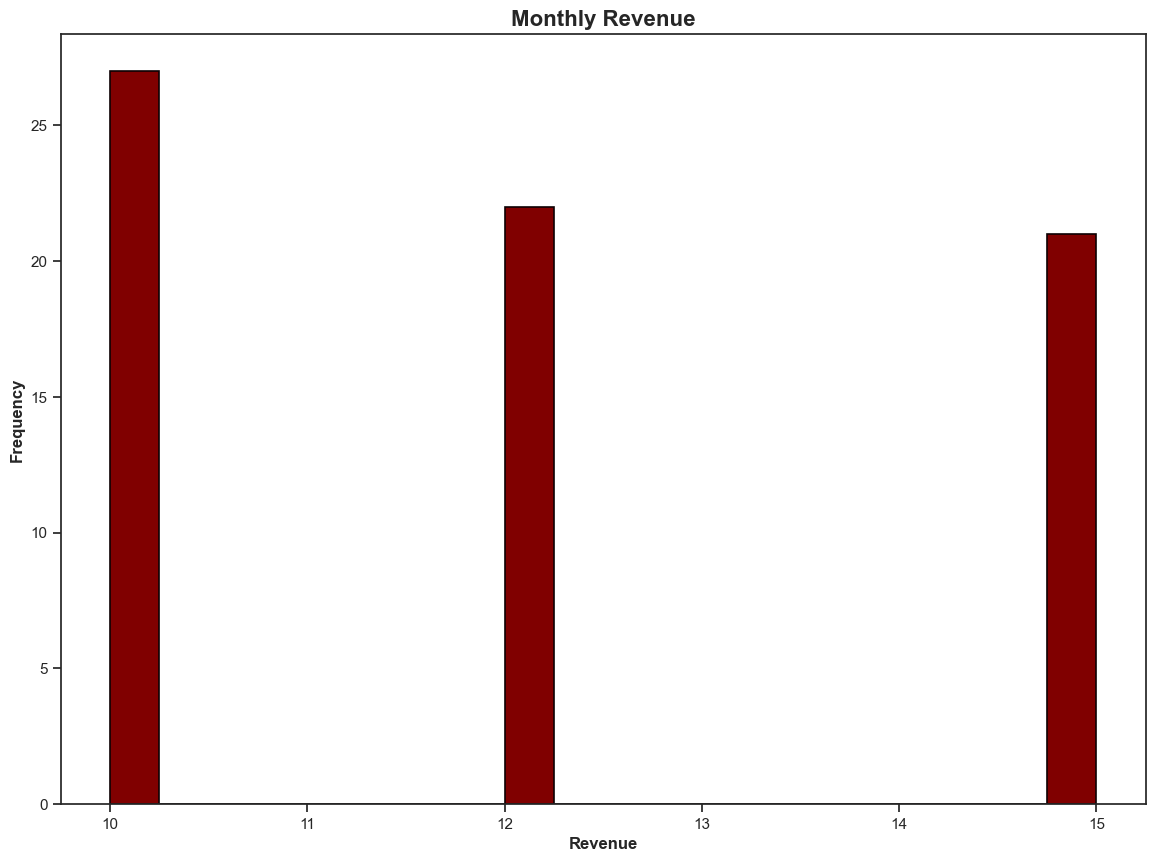

In [208]:
plt.figure(figsize=(14, 10))
plt.hist(df_netflix['monthly_revenue'], bins=20, color='maroon', edgecolor='#0d0103', linewidth=1.2)
plt.title("Monthly Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Revenue", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()



<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Genders </span>

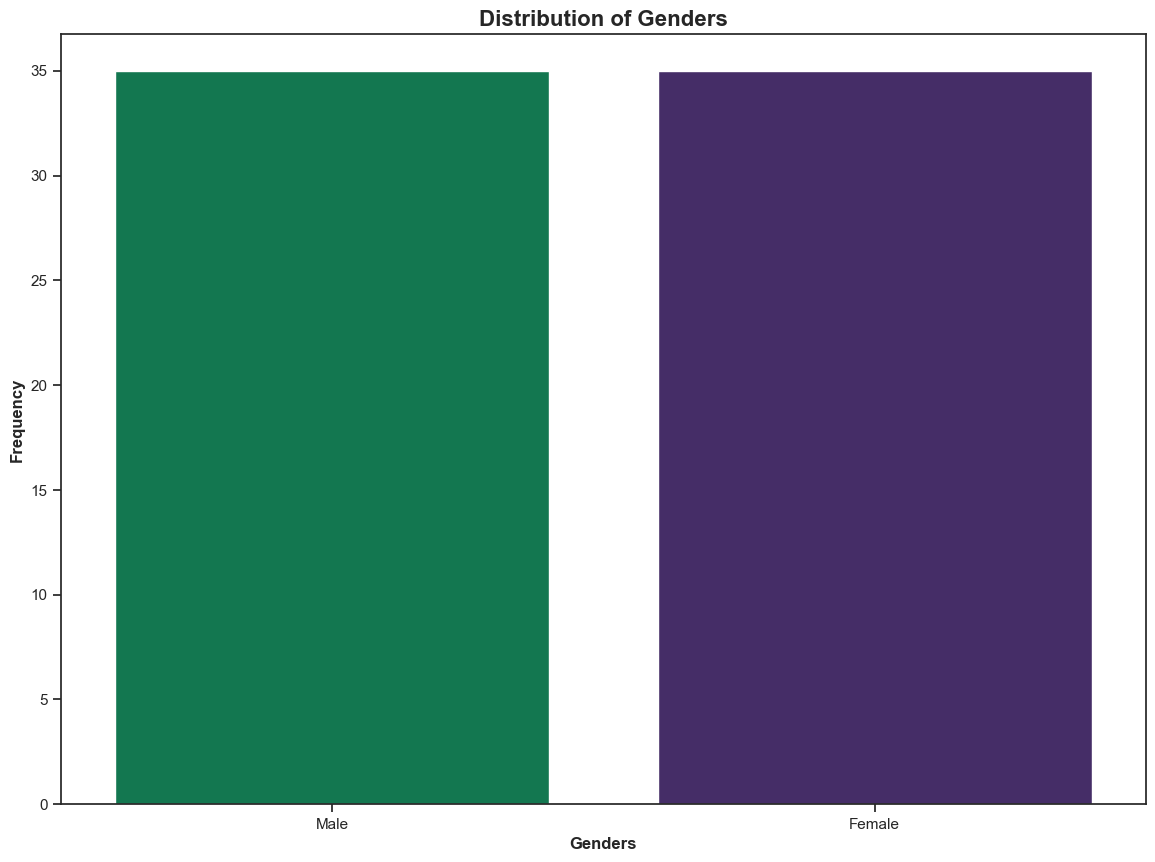

In [209]:
plt.figure(figsize=(14, 10))
title = "Distribution of Genders"
palette=['#038754','#432371']

sns.countplot(x='gender', data=df_netflix, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Age Groups </span>

In [210]:
df_netflix['age'].mean()


36.6

In [211]:
df_netflix['age'].median()


36.0

In [212]:
df_netflix['age'].std()


6.601273482760953

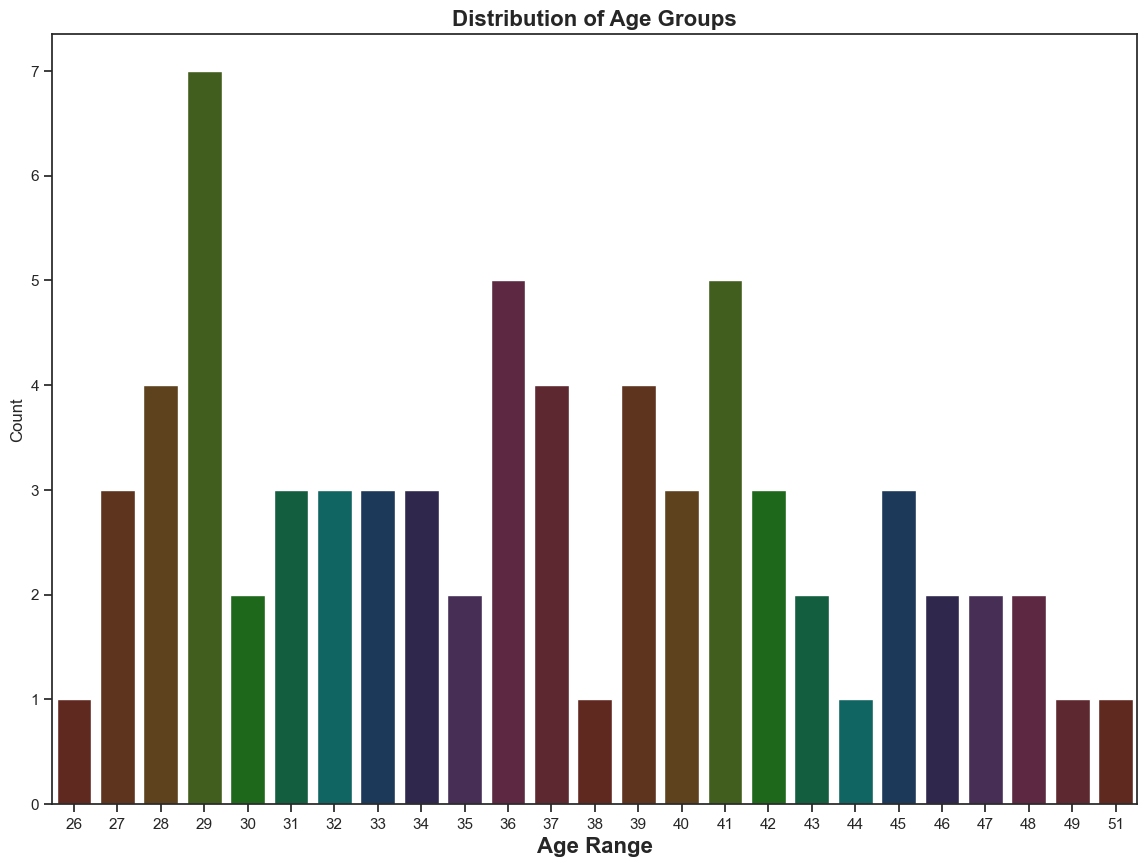

In [213]:
plt.figure(figsize=(14, 10))
title = "Distribution of Age Groups"
palette=['#6b2115','#693113', '#694313', '#436913', '#12750e', '#066b41', '#02736f', '#133863', '#2d2152', '#48275c', 
         '#661f40', '#661f29']

sns.countplot(x='age', data=df_netflix, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.show()


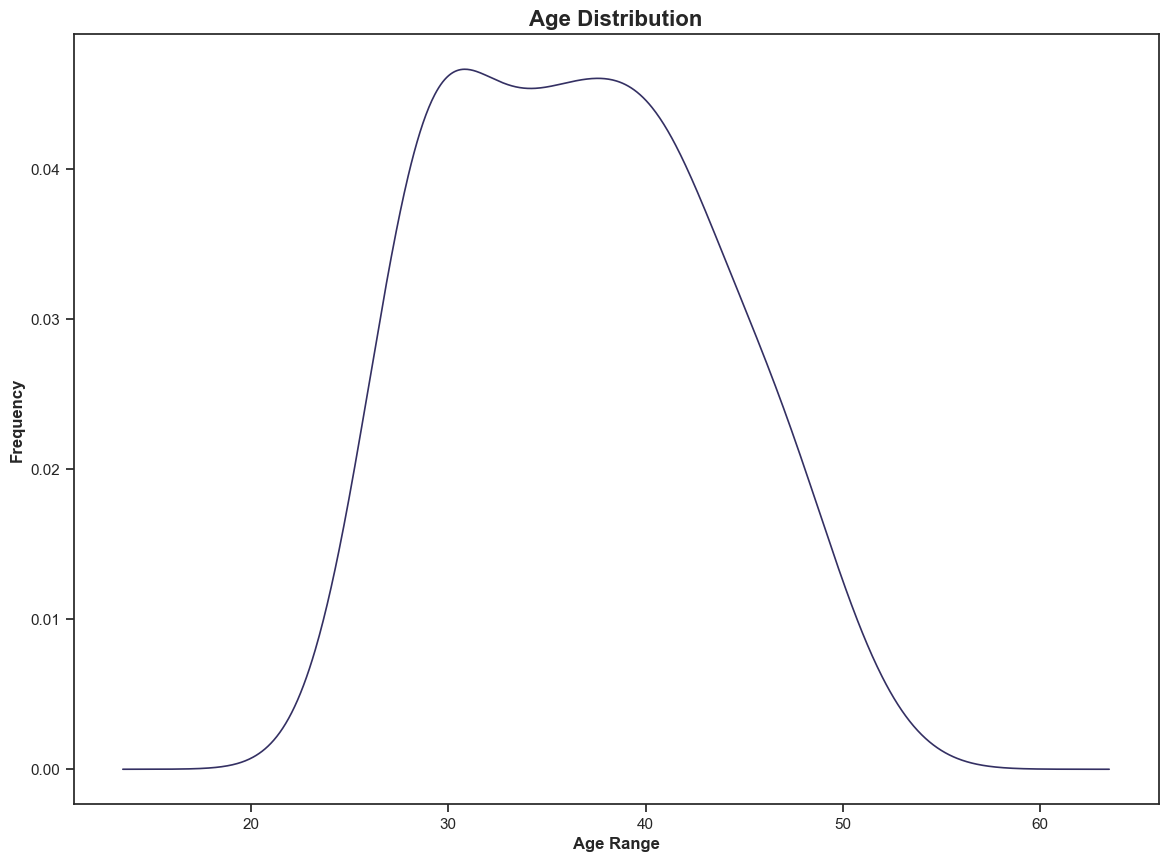

In [214]:
plt.figure(figsize=(14, 10))
df_netflix['age'].plot(kind='kde', color='#343063', linewidth=1.2)
plt.title("Age Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age Range", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()



<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Subscription Types </span>

In [215]:
df_netflix['subscription_type'].unique()


array(['Basic', 'Premium', 'Standard'], dtype=object)

In [216]:
df_netflix['subscription_type'].value_counts()


Basic       27
Standard    22
Premium     21
Name: subscription_type, dtype: int64

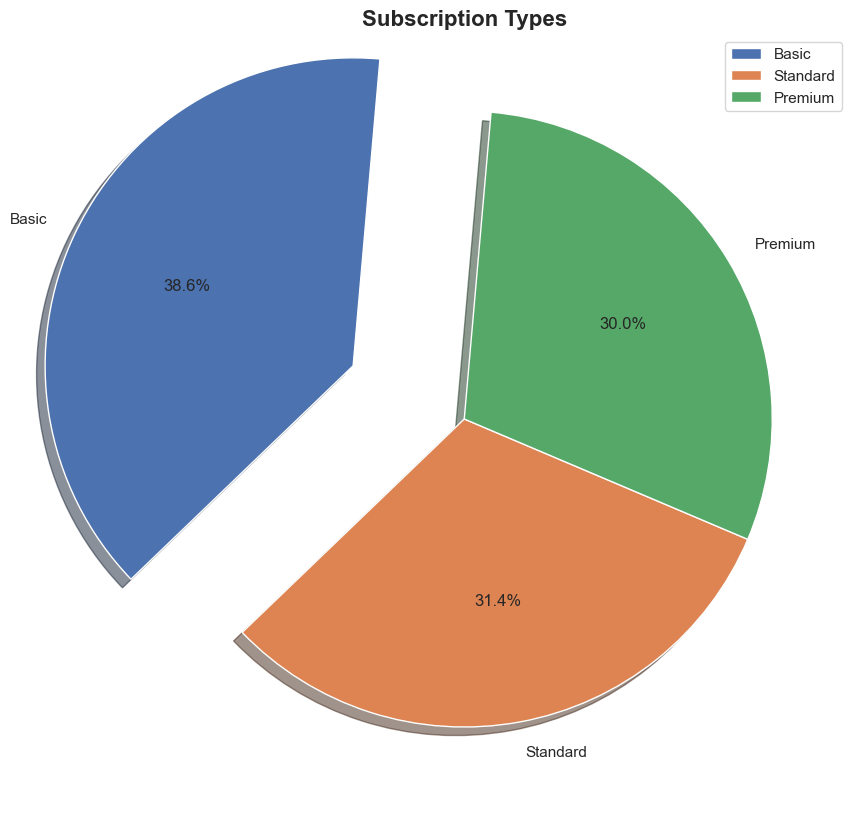

In [217]:
plt.figure(figsize=(14, 10))
explode = [0.4, 0.0, 0.0]
sub_count = df_netflix['subscription_type'].value_counts()
plt.pie(sub_count, labels=sub_count.index, autopct='%1.1f%%', shadow=True, explode=explode, startangle=85)
plt.title('Subscription Types', fontsize=16, fontweight='bold')
plt.legend(loc="upper right")
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly User Analysis </span>

In [218]:
customer_churn = df_netflix['clv'] > 30
customer_churn.value_counts()


True    70
Name: clv, dtype: int64

In [219]:
customer_churn.get(False, 0)

0

In [220]:
df_netflix['start_month'].value_counts()


1     9
2     8
5     7
3     7
12    6
4     6
6     6
9     5
10    5
11    4
8     4
7     3
Name: start_month, dtype: int64

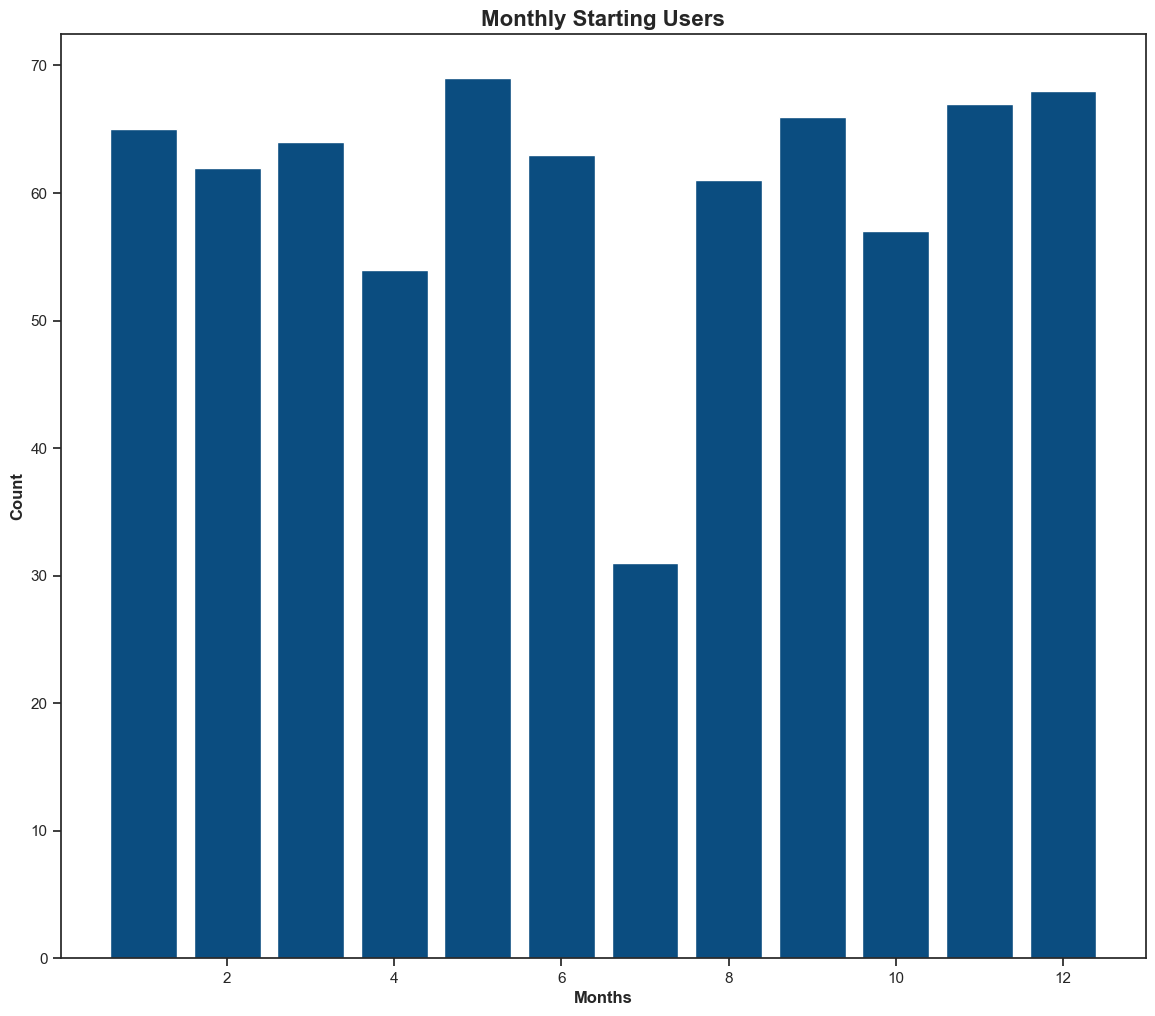

In [221]:
plt.figure(figsize=(14, 12))
plt.bar(df_netflix['start_month'], df_netflix['start_month'].index, color='#0b4d80')
plt.title('Monthly Starting Users', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> User Count in Countries </span>

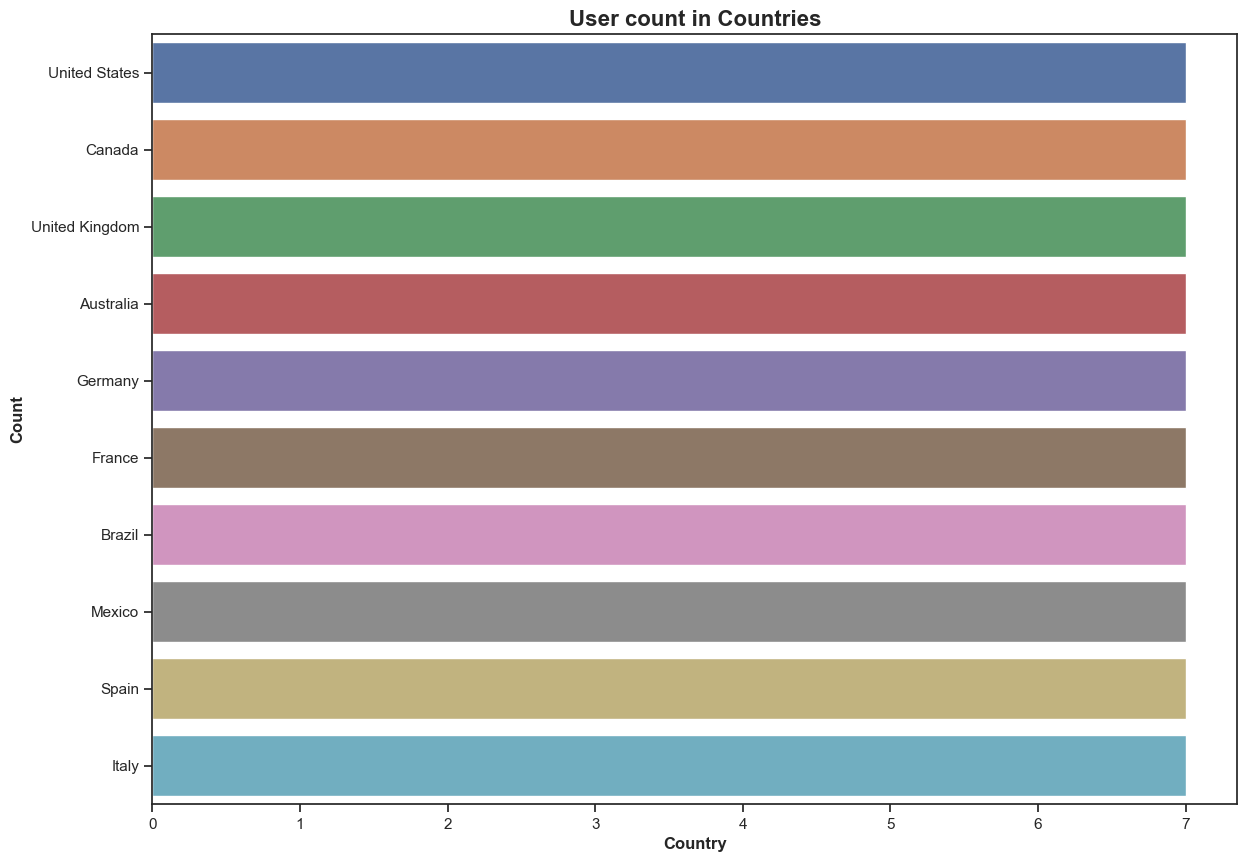

In [222]:
plt.figure(figsize=(14, 10))

sns.countplot(y=df_netflix['country'])
plt.title('User count in Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Age Density </span>

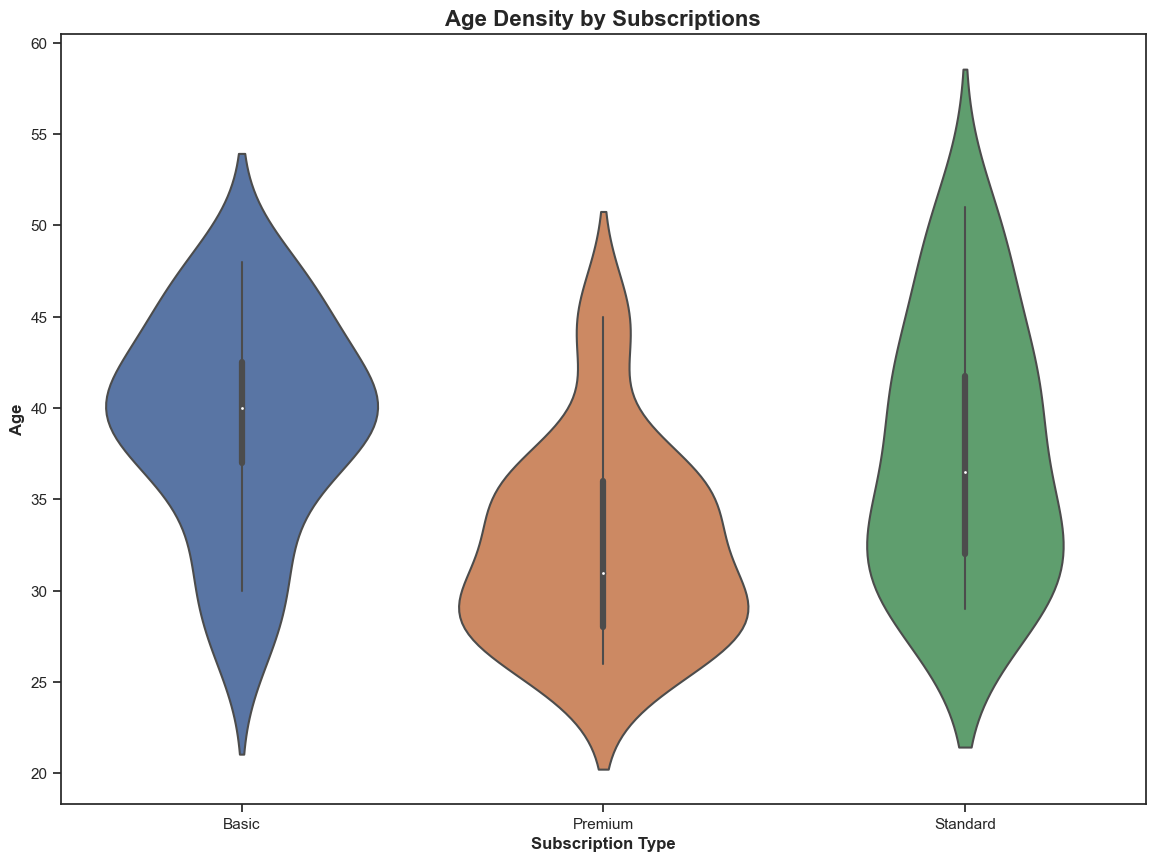

In [223]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='subscription_type', y='age', data=df_netflix)
plt.title('Age Density by Subscriptions', fontsize=16, fontweight='bold')
plt.xlabel('Subscription Type', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.2 Feature Correlations</span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pearson Correlation Heatmap </span>

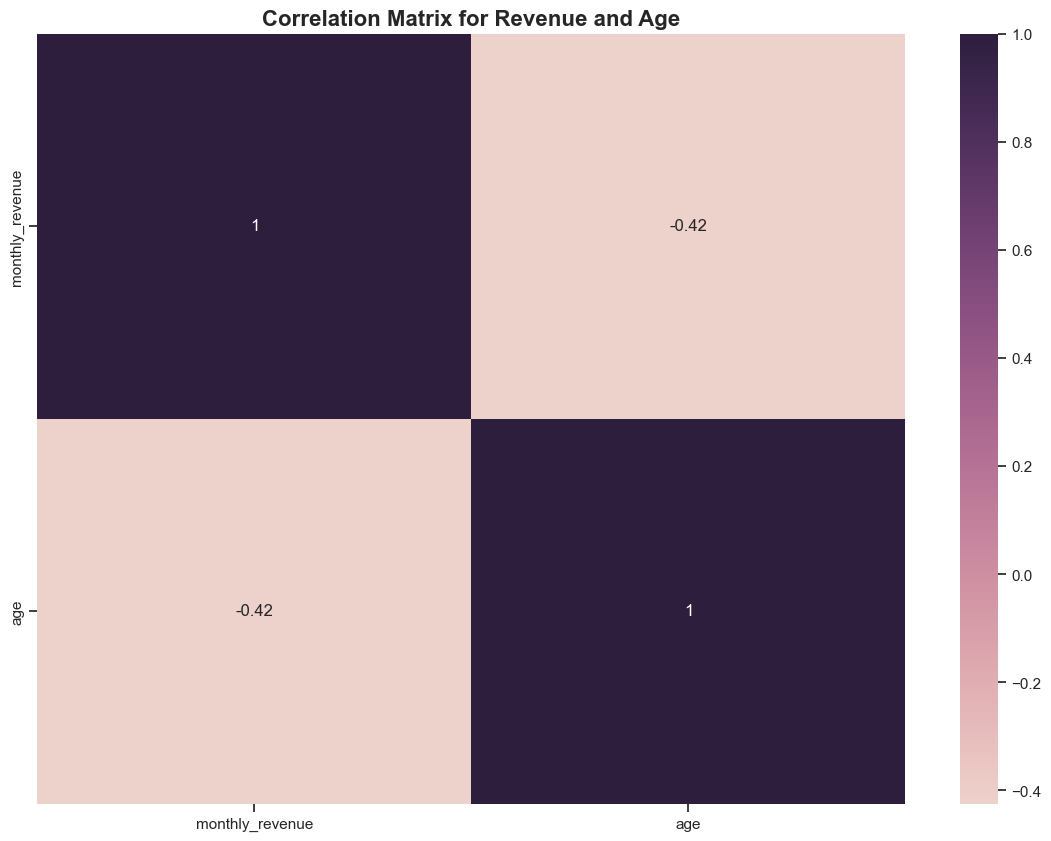

In [224]:
plt.figure(figsize=(14, 10))
title = "Correlation Matrix for Revenue and Age"
corr_matrix = df_netflix[['monthly_revenue', 'age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pair Plots </span>

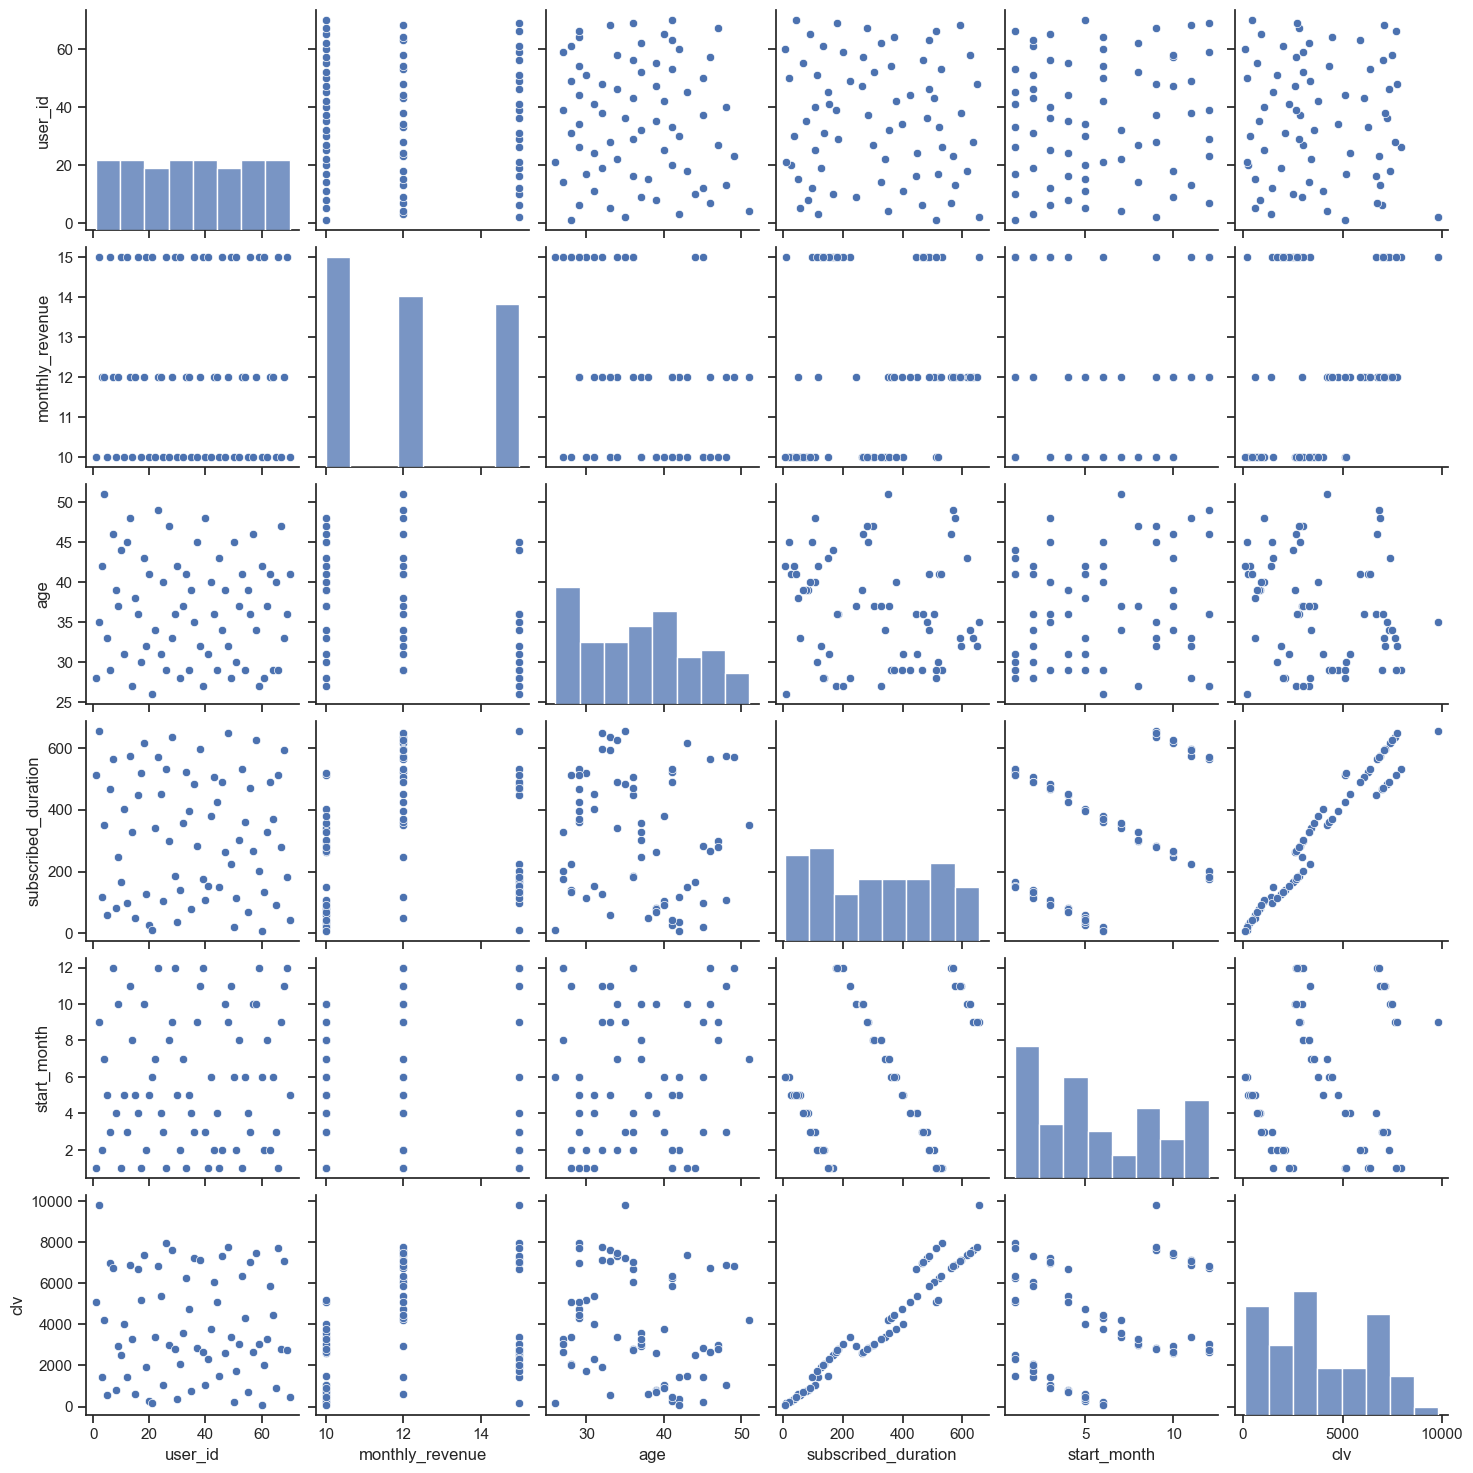

In [225]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_netflix)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenue by Genders </span>

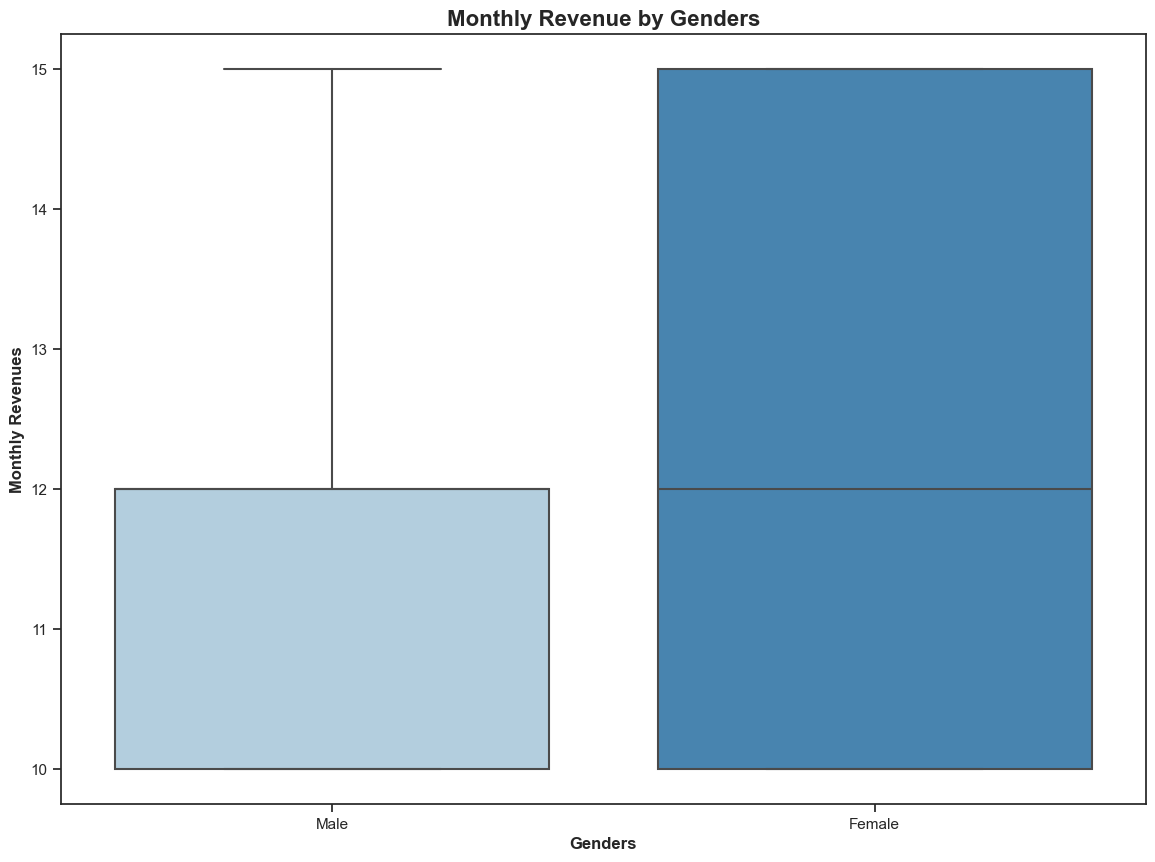

In [226]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='gender', y='monthly_revenue', data=df_netflix, palette="Blues")
plt.title('Monthly Revenue by Genders', fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenues', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Most used Devices </span>

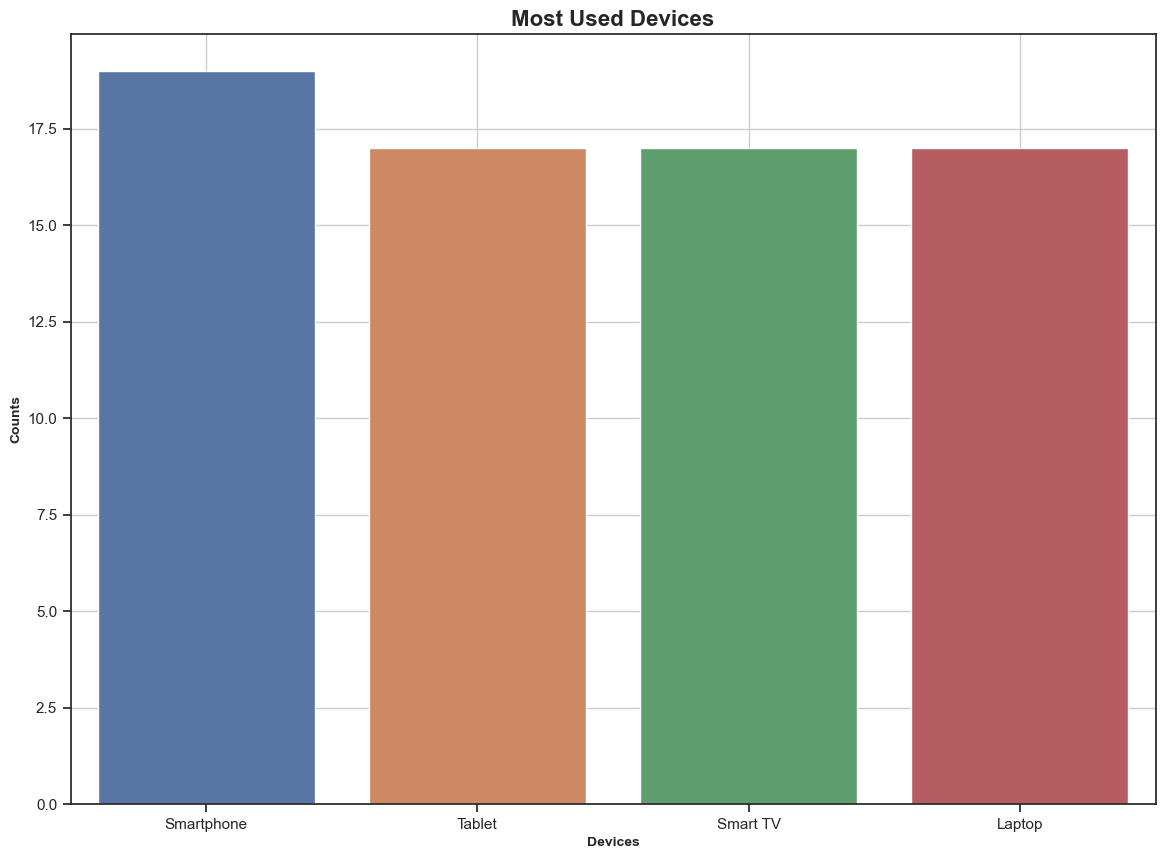

In [227]:
plt.figure(figsize=(14, 10))
sns.countplot(x=df_netflix['device'])
plt.title('Most Used Devices', fontsize=16, fontweight='bold')
plt.xlabel('Devices', fontsize=10, fontweight='bold')
plt.ylabel('Counts', fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenue vs Subscription Types </span>

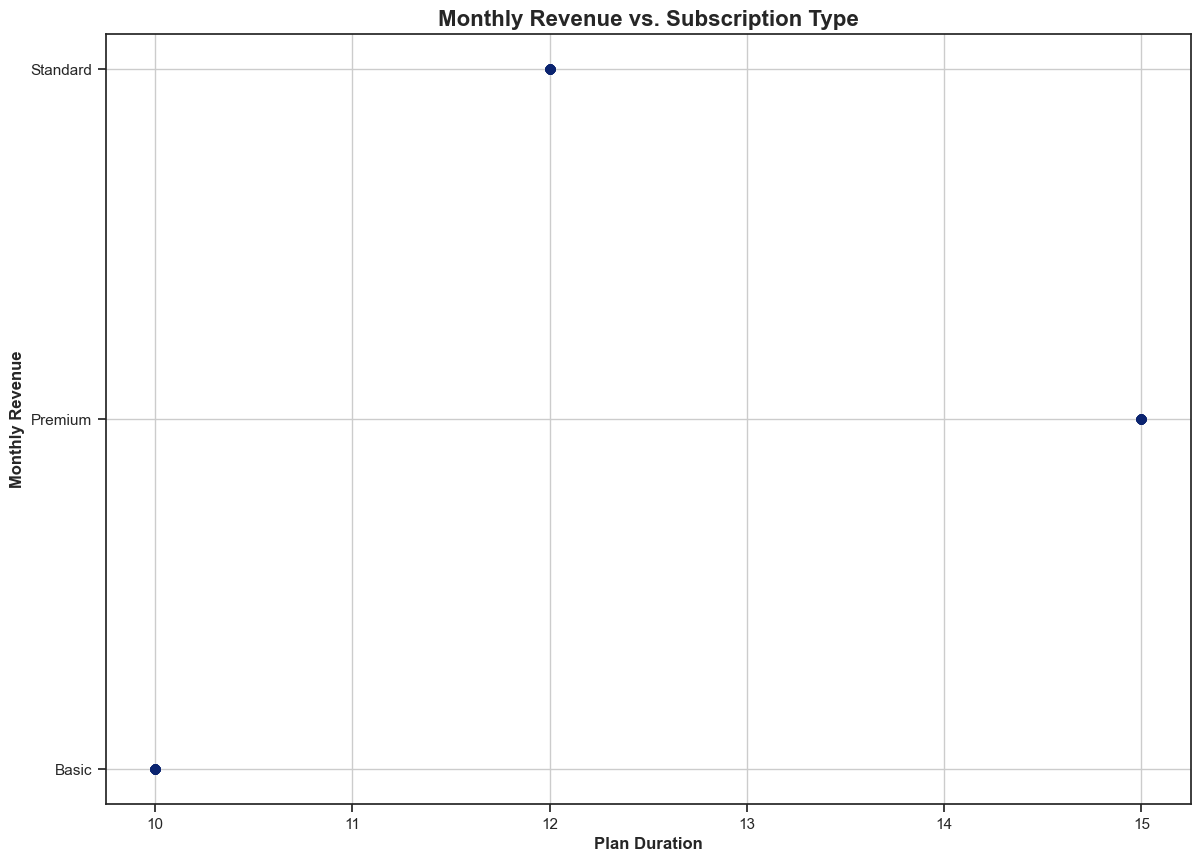

In [228]:
plt.figure(figsize=(14, 10))
plt.scatter(x='monthly_revenue', y='subscription_type', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Monthly Revenue vs. Subscription Type', fontsize=16, fontweight='bold')
plt.xlabel('Plan Duration', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Plan Duration vs Subscription Types </span>

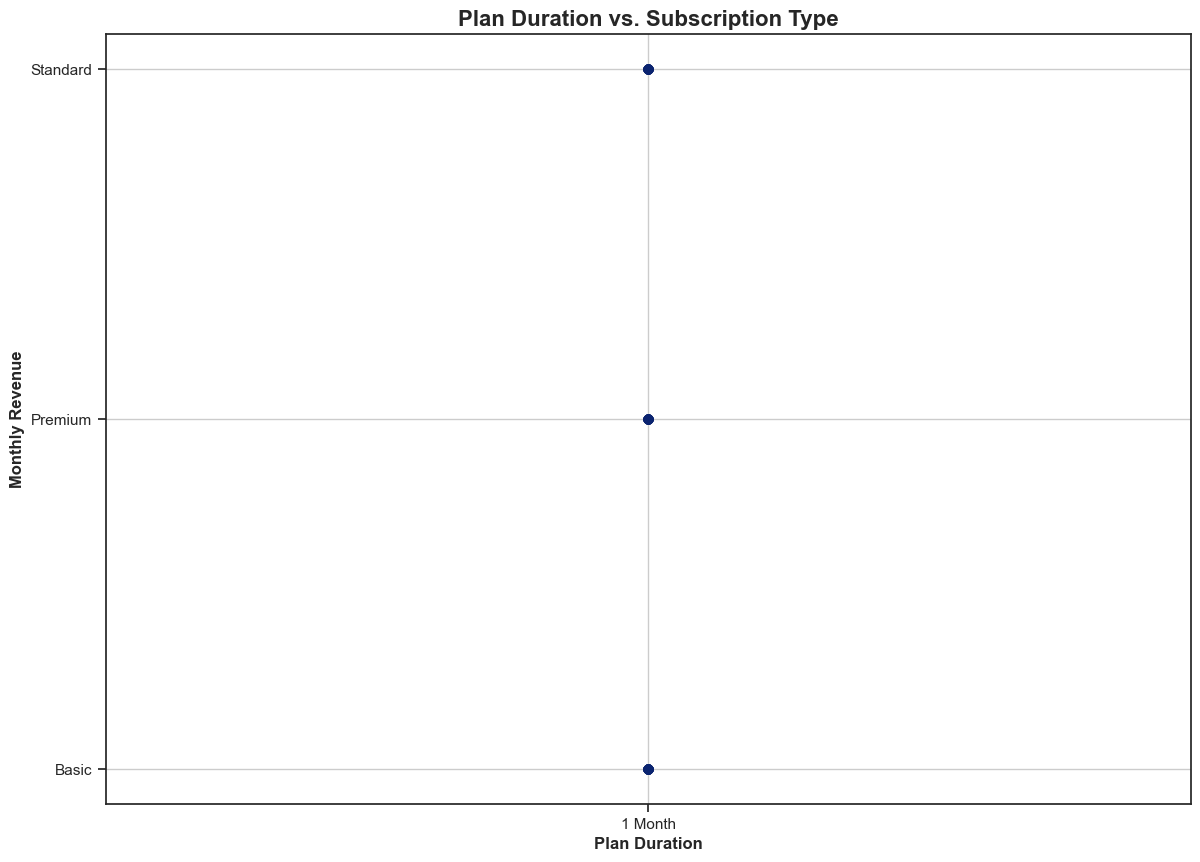

In [229]:
plt.figure(figsize=(14, 10))
plt.scatter(x='plan_duration', y='subscription_type', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Plan Duration vs. Subscription Type', fontsize=16, fontweight='bold')
plt.xlabel('Plan Duration', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Plan Duration vs Monthly Revenues </span>

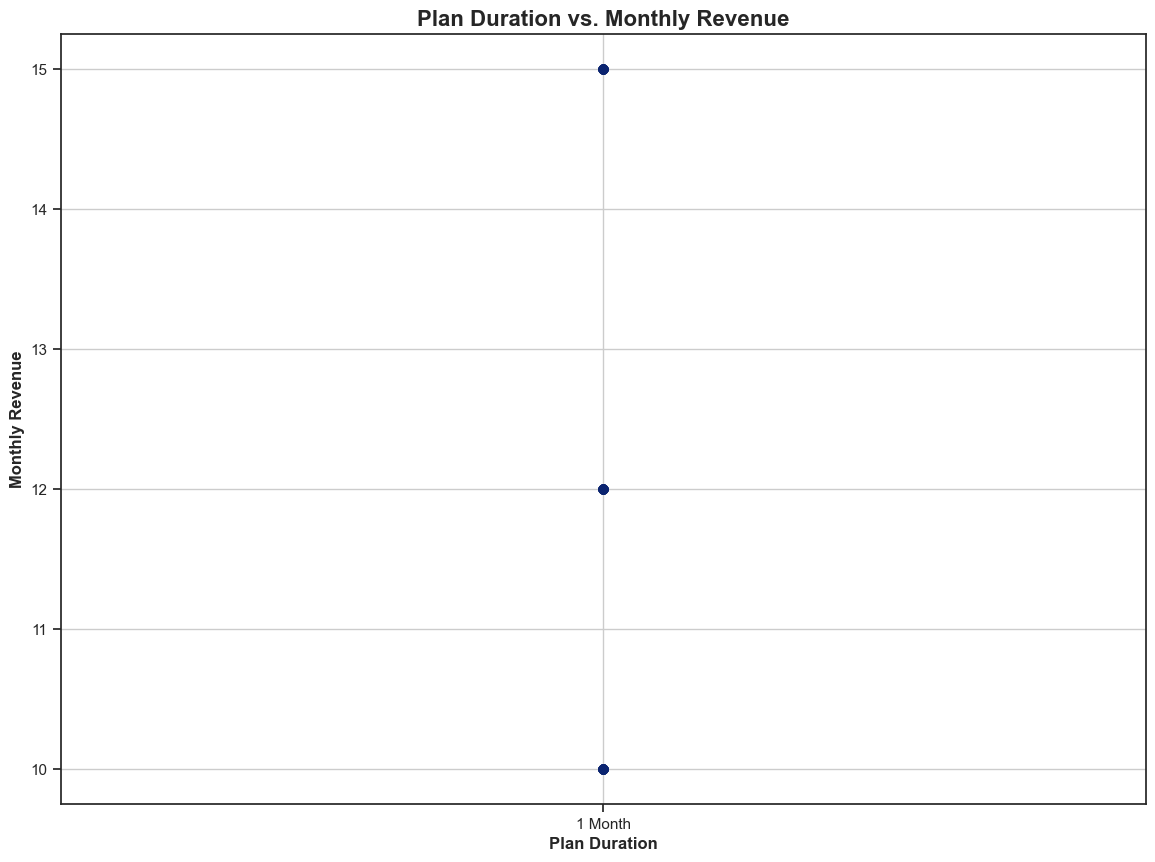

In [230]:
plt.figure(figsize=(14, 10))
plt.scatter(x='plan_duration', y='monthly_revenue', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Plan Duration vs. Monthly Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Plan Duration', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()
